In [1]:
import cv2
import numpy as np
from keras.models import model_from_json
import time

#from timer import Timer

In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("emotion_model.h5")
print("Loaded model from disk")


Loaded model from disk


In [8]:
# start the webcam feed
cap = cv2.VideoCapture(0)
i=0
l=[]
# pass here your video path
#you may download one from here : https://www.pexels.com/video/three-girls-laughing-5273028/
#cap = cv2.VideoCapture("Tom .mp4")
count_0 = 0
count_1 = 0
count_2 = 0
count_3 = 0
count_4 = 0
count_5 = 0
count_6 = 0
while True:
    # Find haar cascade to draw bounding box around face
    startTime = time.time()
    ret, frame = cap.read()
    l.append(i)
    i=i+1
    
    frame = cv2.resize(frame, (1280, 720))
    if not ret:
        break
    face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # detect faces available on camera
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

    # take each face available on the camera and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
        roi_gray_frame = gray_frame[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

        # predict the emotions
        emotion_prediction = emotion_model.predict(cropped_img)
        maxindex = int(np.argmax(emotion_prediction))
        if maxindex == 0:
            count_0 = count_0 + 1
        if maxindex == 1:
            count_1 = count_1 + 1
        if maxindex == 2:
            count_2 = count_2 + 1
        if maxindex == 3:
            count_3 = count_3 + 1
        if maxindex == 4:
            count_4 = count_4 + 1
        if maxindex == 5:
            count_5 = count_5 + 1
        if maxindex == 6:
            count_6 = count_6 + 1
          
        
        cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)

    cv2.imshow('Emotion Detection', frame)
    if cv2.waitKey(1) & 0xFF == ord('s'): #or i==500:#1minute
        break
    

cap.release()
cv2.destroyAllWindows()
#print("Angry" count_0)
"Angry {0}, Disgusted {1}, Fearful {2}, Happy {3}, Neutral {4}, Sad {5}, Surprised {6}".format(count_0,count_1,count_2,count_3,count_4,count_5,count_6)



1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step


'Angry 1, Disgusted 0, Fearful 30, Happy 142, Neutral 8, Sad 52, Surprised 0'

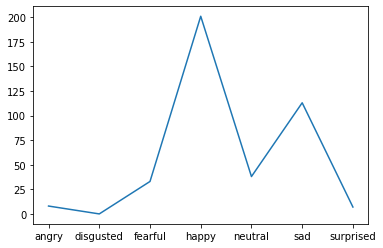

In [4]:
import matplotlib.pyplot as plt

data={'angry':[count_0],'disgusted':[count_1],'fearful':[count_2],'happy':[count_3],'neutral':[count_4],'sad':[count_5],'surprised':[count_6]}
names = list(data.keys())
values = list(data.values())
plt.plot(names,values) 
plt.show()

In [1]:
data={'angry': [1, 20],
 'disgusted': [0, 0],
 'fearful': [52, 99],
 'happy': [1186, 446],
 'neutral': [1182, 417],
 'sad': [138, 14],
 'surprised': [6, 87]}

In [2]:
data

{'angry': [1, 20],
 'disgusted': [0, 0],
 'fearful': [52, 99],
 'happy': [1186, 446],
 'neutral': [1182, 417],
 'sad': [138, 14],
 'surprised': [6, 87]}

In [3]:
import pandas as pd
df = pd.DataFrame.from_dict(data)
df

,angry,disgusted,fearful,happy,neutral,sad,surprised
0,1,0,52,1186,1182,138,6
1,20,0,99,446,417,14,87


In [4]:
datamean={'angry':df['angry'].mean(),'disgusted':df['disgusted'].mean(),'fearful':df['fearful'].mean(),'happy':df['happy'].mean(),'neutral':df['neutral'].mean(),'sad':df['sad'].mean(),'surprised':df['surprised'].mean()}
datamean


{'angry': 10.5,
 'disgusted': 0.0,
 'fearful': 75.5,
 'happy': 816.0,
 'neutral': 799.5,
 'sad': 76.0,
 'surprised': 46.5}

In [8]:
import numpy as np
datastd={'angry':np.std(list(df['angry'])),'disgusted':np.std(list(df['disgusted'])),'fearful':np.std(list(df['fearful'])),'happy':np.std(list(df['happy'])),'neutral':np.std(list(df['neutral'])),'sad':np.std(list(df['sad'])),'surprised':np.std(list(df['surprised']))}
datastd


{'angry': 9.5,
 'disgusted': 0.0,
 'fearful': 23.5,
 'happy': 370.0,
 'neutral': 382.5,
 'sad': 62.0,
 'surprised': 40.5}

In [71]:
datastd['happy']

485.7866472708638

In [16]:
from math import *
if abs(datamean['happy']-count_3) > 1.5*datastd['happy']:
    print('autistic')

autistic


In [63]:
st_dev = np.std(list(df['angry']))
st_dev

7.788880963698615

In [56]:
# import pandas as pd
# x=list(df.columns)
# y=list(df.index)
# print(x,y)

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised'] [0, 1, 2]


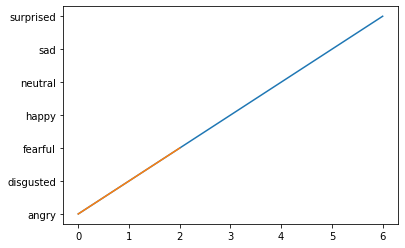

In [59]:
plt.plot(range(0,7),x)
plt.plot(range(0,3),y)

In [ ]:
import pandas as pd
resulta = pd.DataFrame(resulta,columns=["frame","Angry","Disgusted","Fearful","Happy","Neutral","Sad","Surprised"])
resulta